# Capstone Project: Credit Card Fraud Detection

## Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

## Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

### Project Pipeline

The project pipeline can be briefly summarized in the following four steps:

Data Understanding: Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.

Exploratory data analytics (EDA): Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.

Train/Test Split: Now you are familiar with the train/test split, which you can perform in order to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.

Model-Building/Hyperparameter Tuning: This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given dataset. You should try and see if you get a better model by the various sampling techniques.

Model Evaluation: Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. Choose an appropriate evaluation metric which reflects this business goal.

### Below are the steps which we will be basically following:

- Step 1: Reading and Understanding the Data
- Step 2: Data Cleansing
   - Null Check
   - Data type check
- Step 3: Data Visualization
  - Imbalanced Data check
  - Data Distribution Plots
- Step 4: Splitting the Data into Training and Testing Sets
  - Stratified Train Test Split
  - Skewness Check and Fix
- Step 5: Building a Logistic Model
  - Logistic Regression on Imbalanced Data
  - Random Forest on Imbalanced Data
  
  - Logistic Regression on Balanced Data (Random Over Sampling,SMOTE,ADASYN)
  - Random Forest on Balanced Data (Random Over Sampling,SMOTE,ADASYN)
  
  - Stratified K-Fold and Hyperparameter Tuning
  - Classification Report
  - Confusion Matrix
  - ROC AUC Curve
- Step 6: Final Analysis
  - Best Model Selection
  - Features Importance
- Step 7: Closing Statement

### Step 1: Reading and Understanding the Data

In [ ]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraud detection case study/fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraud detection case study/fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_train.shape

(1296675, 23)

In [ ]:
df_test.shape

(555719, 23)

### Step 2: Data Cleansing

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

- There are no null values 

In [ ]:
df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['date']=pd.to_datetime(df_train['date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['date']=pd.to_datetime(df_test['date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [ ]:
df_train=df_train.drop(['trans_date_trans_time','Unnamed: 0','first','last','cc_num','street','lat','long','trans_num','unix_time','merch_lat','merch_long'],axis=1)
df_test=df_test.drop(['trans_date_trans_time','Unnamed: 0','first','last','cc_num','street','lat','long','trans_num','unix_time','merch_lat','merch_long'],axis=1)

In [ ]:
df_train.head()

,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,date
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0,2019-01-01
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,0,2019-01-01
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,0,2019-01-01
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,1967-01-12,0,2019-01-01
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,0,2019-01-01


In [ ]:
# Creating field for age on transaction date

df_train['age_at_trans'] = df_train['date'] - df_train['dob']
df_train['age_at_trans'] = df_train['age_at_trans'].astype('timedelta64[Y]')

df_test['age_at_trans'] = df_test['date'] - df_test['dob']
df_test['age_at_trans'] = df_test['age_at_trans'].astype('timedelta64[Y]')

df_train.head()

,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,date,age_at_trans
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0,2019-01-01,30.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,0,2019-01-01,40.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,0,2019-01-01,56.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,1967-01-12,0,2019-01-01,51.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,0,2019-01-01,32.0


Grouping age column


In [ ]:
df_train['age_at_trans'].value_counts()

47.0    40410
34.0    38754
35.0    35597
46.0    35089
43.0    34802
        ...  
87.0     2492
17.0     2387
94.0      300
95.0      236
13.0       81
Name: age_at_trans, Length: 83, dtype: int64

In [ ]:
def age_cat(x):
    if x <18:
        return 'teenager'
    if x in range(18,65):
        return 'working population'
    if x in range(66,95):
        return 'senior citizen'
    else:
        'unknown'

In [ ]:
df_train['age_cat']=df_train['age_at_trans'].apply(age_cat)

In [ ]:
df_test['age_cat']=df_test['age_at_trans'].apply(age_cat)

In [ ]:
df_train['age_cat'].value_counts()

working population    1087399
senior citizen         178236
teenager                15568
Name: age_cat, dtype: int64

In [ ]:
df_test['age_cat'].value_counts()

working population    458374
senior citizen         82788
teenager                6292
Name: age_cat, dtype: int64

In [ ]:
# Creating month column

df_train['trans_month'] = pd.DatetimeIndex(df_train['date']).month
df_test['trans_month'] = pd.DatetimeIndex(df_test['date']).month

df_train[['date','trans_month']].head()

,date,trans_month
0,2019-01-01,1
1,2019-01-01,1
2,2019-01-01,1
3,2019-01-01,1
4,2019-01-01,1


In [ ]:
df_train['trans_month'] = df_train['date'].dt.month_name()
df_train[['date','trans_month']].head()

,date,trans_month
0,2019-01-01,January
1,2019-01-01,January
2,2019-01-01,January
3,2019-01-01,January
4,2019-01-01,January


In [ ]:
df_test['trans_month'] = df_test['date'].dt.month_name()
df_test[['date','trans_month']].head()

,date,trans_month
0,2020-06-21,June
1,2020-06-21,June
2,2020-06-21,June
3,2020-06-21,June
4,2020-06-21,June


In [ ]:
df_train['trans_month'].value_counts()

May          146875
June         143811
March        143789
December     141060
April        134970
January      104727
February      97657
August        87359
July          86596
September     70652
November      70421
October       68758
Name: trans_month, dtype: int64

In [ ]:
df_test['trans_month'].value_counts()

December     139538
August        88759
July          85848
November      72635
September     69533
October       69348
June          30058
Name: trans_month, dtype: int64

In [ ]:
df_train.head()

,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,date,age_at_trans,age_cat,trans_month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0,2019-01-01,30.0,working population,January
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,0,2019-01-01,40.0,working population,January
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,0,2019-01-01,56.0,working population,January
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,1939,Patent attorney,1967-01-12,0,2019-01-01,51.0,working population,January
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,0,2019-01-01,32.0,working population,January


In [ ]:
df_train['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

In [ ]:
df_train['zip'].value_counts()

73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
78208       7
38915       7
37411       7
10018       7
61364       7
Name: zip, Length: 970, dtype: int64

In [ ]:
df_train['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

In [ ]:
df_train['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [ ]:
df_train['merchant'].value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [ ]:
df_train['city_pop'].value_counts()

606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
4046          7
1888          7
3631          7
198659        7
242803        7
Name: city_pop, Length: 879, dtype: int64

In [ ]:
df_train['job'].value_counts()

Film/video editor                 9779
Exhibition designer               9199
Naval architect                   8684
Surveyor, land/geomatics          8680
Materials engineer                8270
                                  ... 
Armed forces technical officer       8
Information officer                  8
Contracting civil engineer           7
Ship broker                          7
Warehouse manager                    7
Name: job, Length: 494, dtype: int64

In [ ]:
df_train=df_train.drop(['merchant','city','zip','job','dob','age_at_trans','date'],axis=1)
df_test=df_test.drop(['merchant','city','zip','job','dob','age_at_trans','date'],axis=1)


In [ ]:
print(df_train.head())
print(df_test.head())


        category     amt gender  ... is_fraud             age_cat  trans_month
0       misc_net    4.97      F  ...        0  working population      January
1    grocery_pos  107.23      F  ...        0  working population      January
2  entertainment  220.11      M  ...        0  working population      January
3  gas_transport   45.00      M  ...        0  working population      January
4       misc_pos   41.96      M  ...        0  working population      January

[5 rows x 8 columns]
         category    amt gender  ... is_fraud             age_cat  trans_month
0   personal_care   2.86      M  ...        0  working population         June
1   personal_care  29.84      F  ...        0  working population         June
2  health_fitness  41.28      F  ...        0  working population         June
3        misc_pos  60.05      M  ...        0  working population         June
4          travel   3.19      M  ...        0  working population         June

[5 rows x 8 columns]


In [ ]:
df_train['gender'] = df_train['gender'].map({'M': 1, 'F': 0})
df_test['gender'] = df_test['gender'].map({'M': 1, 'F': 0})
df_train.head()

,category,amt,gender,state,city_pop,is_fraud,age_cat,trans_month
0,misc_net,4.97,0,NC,3495,0,working population,January
1,grocery_pos,107.23,0,WA,149,0,working population,January
2,entertainment,220.11,1,ID,4154,0,working population,January
3,gas_transport,45.00,1,MT,1939,0,working population,January
4,misc_pos,41.96,1,VA,99,0,working population,January


## EDA

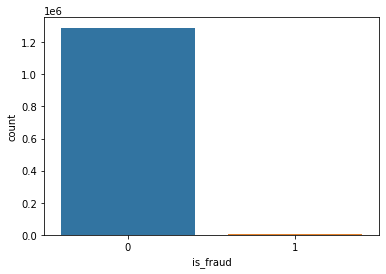

In [ ]:
# Data imbalance check
sns.countplot(x='is_fraud',data=df_train)

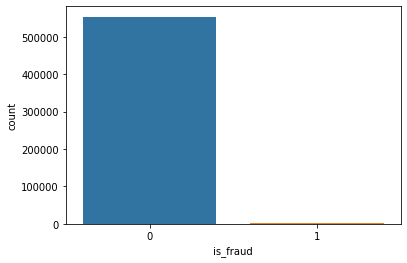

In [ ]:
# Data imbalance check
sns.countplot(x='is_fraud',data=df_test)

In [ ]:
(df_train['is_fraud'].value_counts()/len(df_train))*100

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

In [ ]:
(df_test['is_fraud'].value_counts()/len(df_test))*100

0    99.614014
1     0.385986
Name: is_fraud, dtype: float64

As we can see here, this is a case of imbalance data

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

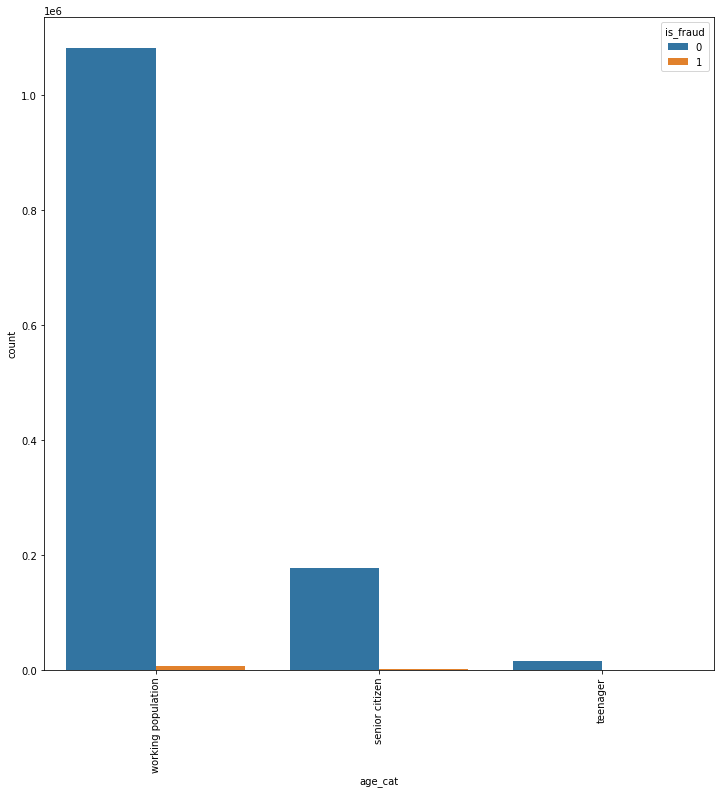

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='age_cat',hue='is_fraud',data=df_train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

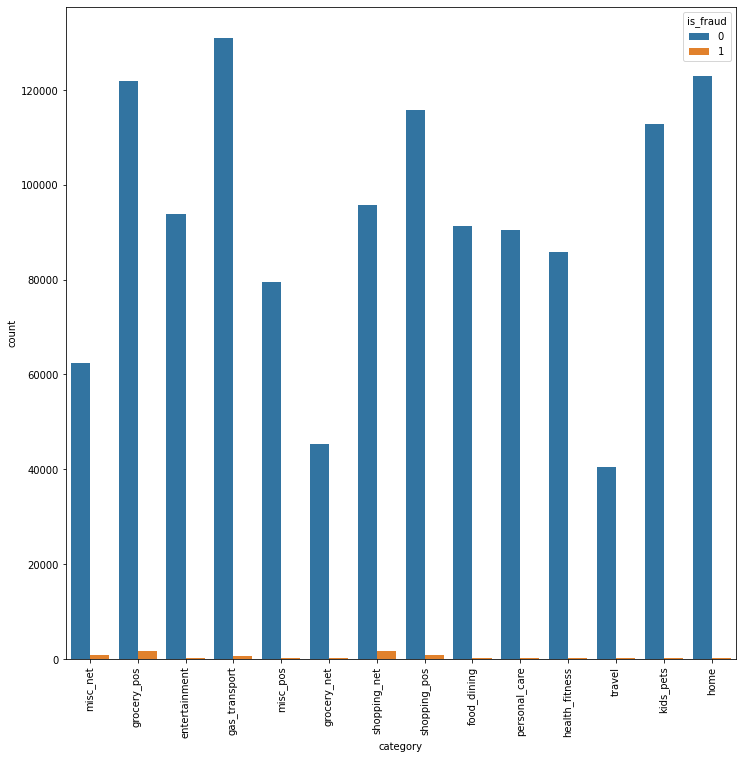

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='category',hue='is_fraud',data=df_train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

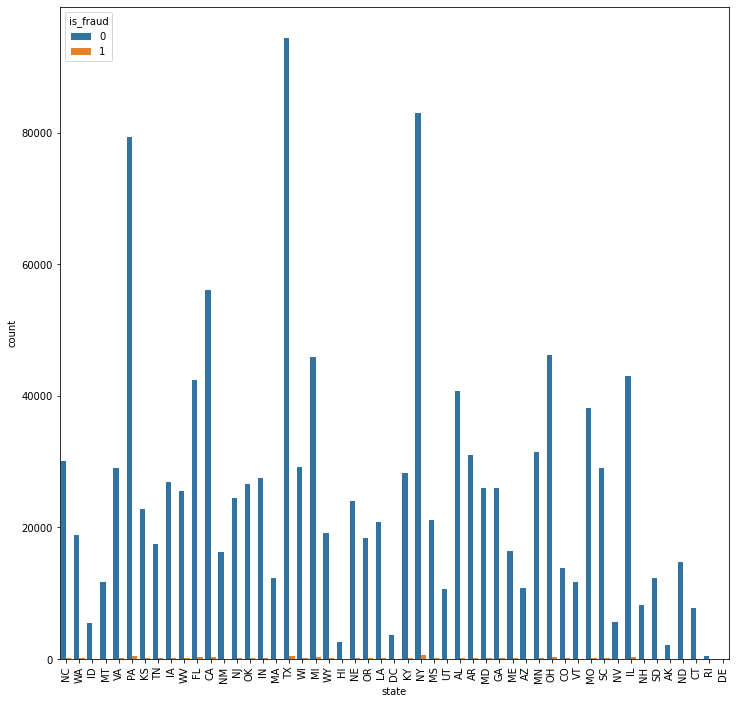

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='state',hue='is_fraud',data=df_train)
plt.xticks(rotation=90)

In [ ]:
cor=df_train.corr()
cor

,amt,gender,city_pop,is_fraud
amt,1.000000,0.001034,0.005818,0.219404
gender,0.001034,1.000000,-0.028649,0.007642
city_pop,0.005818,-0.028649,1.000000,0.002136
is_fraud,0.219404,0.007642,0.002136,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

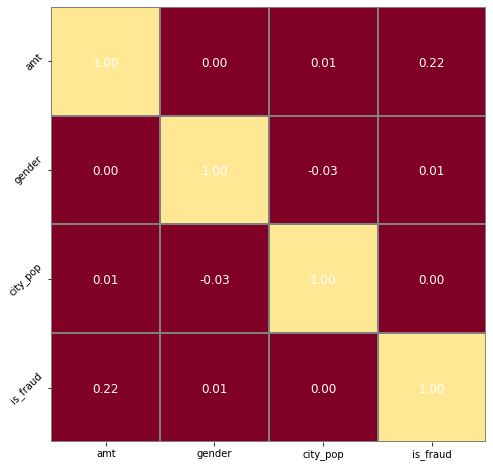

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,cmap="YlOrRd_r", center=0.8, square=True, annot=True,
                 annot_kws={"size": 12, "va": "center_baseline", "color": "white"}, fmt=".2f", 
                  linewidth=1, linecolor="grey", vmin=0.5, vmax=1, cbar=False)
plt.yticks(rotation=45)

In [ ]:
df_train.nunique()

category          14
amt            52928
gender             2
state             51
city_pop         879
is_fraud           2
age_cat            3
trans_month       12
dtype: int64

In [ ]:
df_test.nunique()

category          14
amt            37256
gender             2
state             50
city_pop         835
is_fraud           2
age_cat            3
trans_month        7
dtype: int64

In [ ]:
dum_cols=['category','state','age_cat','trans_month']

In [ ]:
# treating categorical values
df_train_dum = pd.get_dummies(df_train[dum_cols],drop_first=True)
df_test_dum = pd.get_dummies(df_test[dum_cols],drop_first=True)

df_train_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 76 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   category_food_dining        1296675 non-null  uint8
 1   category_gas_transport      1296675 non-null  uint8
 2   category_grocery_net        1296675 non-null  uint8
 3   category_grocery_pos        1296675 non-null  uint8
 4   category_health_fitness     1296675 non-null  uint8
 5   category_home               1296675 non-null  uint8
 6   category_kids_pets          1296675 non-null  uint8
 7   category_misc_net           1296675 non-null  uint8
 8   category_misc_pos           1296675 non-null  uint8
 9   category_personal_care      1296675 non-null  uint8
 10  category_shopping_net       1296675 non-null  uint8
 11  category_shopping_pos       1296675 non-null  uint8
 12  category_travel             1296675 non-null  uint8
 13  state_AL                   

In [ ]:
df_test_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   category_food_dining        555719 non-null  uint8
 1   category_gas_transport      555719 non-null  uint8
 2   category_grocery_net        555719 non-null  uint8
 3   category_grocery_pos        555719 non-null  uint8
 4   category_health_fitness     555719 non-null  uint8
 5   category_home               555719 non-null  uint8
 6   category_kids_pets          555719 non-null  uint8
 7   category_misc_net           555719 non-null  uint8
 8   category_misc_pos           555719 non-null  uint8
 9   category_personal_care      555719 non-null  uint8
 10  category_shopping_net       555719 non-null  uint8
 11  category_shopping_pos       555719 non-null  uint8
 12  category_travel             555719 non-null  uint8
 13  state_AL                    555719 non-null 

In [ ]:
df_train=df_train.drop(dum_cols,axis=1)
df_test=df_test.drop(dum_cols,axis=1)

In [ ]:
df_train=pd.concat([df_train,df_train_dum],axis=1)
df_train.shape

(1296675, 80)

In [ ]:
df_test=pd.concat([df_test,df_test_dum],axis=1)
df_test.shape

(555719, 74)

In [ ]:
df_train=df_train.drop(['trans_month_August','trans_month_February','trans_month_January','trans_month_March','trans_month_May','state_DE'],axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 74 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   amt                         1296675 non-null  float64
 1   gender                      1296675 non-null  int64  
 2   city_pop                    1296675 non-null  int64  
 3   is_fraud                    1296675 non-null  int64  
 4   category_food_dining        1296675 non-null  uint8  
 5   category_gas_transport      1296675 non-null  uint8  
 6   category_grocery_net        1296675 non-null  uint8  
 7   category_grocery_pos        1296675 non-null  uint8  
 8   category_health_fitness     1296675 non-null  uint8  
 9   category_home               1296675 non-null  uint8  
 10  category_kids_pets          1296675 non-null  uint8  
 11  category_misc_net           1296675 non-null  uint8  
 12  category_misc_pos           1296675 non-null  uint8  
 1

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   amt                         555719 non-null  float64
 1   gender                      555719 non-null  int64  
 2   city_pop                    555719 non-null  int64  
 3   is_fraud                    555719 non-null  int64  
 4   category_food_dining        555719 non-null  uint8  
 5   category_gas_transport      555719 non-null  uint8  
 6   category_grocery_net        555719 non-null  uint8  
 7   category_grocery_pos        555719 non-null  uint8  
 8   category_health_fitness     555719 non-null  uint8  
 9   category_home               555719 non-null  uint8  
 10  category_kids_pets          555719 non-null  uint8  
 11  category_misc_net           555719 non-null  uint8  
 12  category_misc_pos           555719 non-null  uint8  
 13  category_perso

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_col=['amt','city_pop']

In [ ]:
df_train[X_col]=scaler.fit_transform(df_train[X_col])
df_test[X_col]=scaler.transform(df_test[X_col])

In [ ]:
X_train = df_train.drop(['is_fraud'],axis=1)
y_train = df_train['is_fraud']

X_test = df_test.drop(['is_fraud'],axis=1)
y_test = df_test['is_fraud']

In [ ]:
# treating imbalnced data

### Using ADASYN

In [ ]:

# Using ADASYN to oversample

from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1288968)]


# MODEL BUILDING

## Using Logistic Reason

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)

In [ ]:
#Building Logistic Regression  Model
logreg.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Model Evaluation
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [ ]:
y_train_pred = logreg.predict(X_train_res)
y_test_pred = logreg.predict(X_test)

In [ ]:
print(confusion_matrix(y_train_res, y_train_pred))
print(classification_report(y_train_res, y_train_pred))

[[998149 291020]
 [380330 908638]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.75   1289169
           1       0.76      0.70      0.73   1288968

    accuracy                           0.74   2578137
   macro avg       0.74      0.74      0.74   2578137
weighted avg       0.74      0.74      0.74   2578137



In [ ]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[455241  98333]
 [   497   1648]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    553574
           1       0.02      0.77      0.03      2145

    accuracy                           0.82    555719
   macro avg       0.51      0.80      0.47    555719
weighted avg       1.00      0.82      0.90    555719



**Building a Decision Tree Model**

In [ ]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Model Evaluation
print("Train Results")
pred_train = dt_clf.predict(X_train_res)

print(confusion_matrix(y_train_res, pred_train))
print(classification_report(y_train_res, pred_train))

Train Results
[[1261602   27567]
 [   3343 1285625]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289169
           1       0.98      1.00      0.99   1288968

    accuracy                           0.99   2578137
   macro avg       0.99      0.99      0.99   2578137
weighted avg       0.99      0.99      0.99   2578137



In [ ]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[542678  10896]
 [   363   1782]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.14      0.83      0.24      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.91      0.62    555719
weighted avg       1.00      0.98      0.99    555719



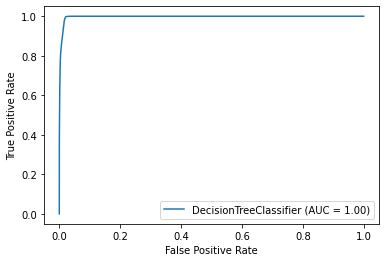

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_clf, X_train_res, y_train_res, drop_intermediate=False)
plt.show()

**Building a Random Forest Model**

In [ ]:
# Importing required library

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)

In [ ]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
rf.oob_score_

0.7904238603301531

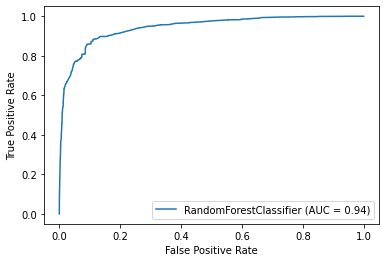

In [ ]:
plot_roc_curve(rf, X_train_res, y_train_res)
plt.show()

In [ ]:
(rf.feature_importances_)

array([5.26674974e-01, 7.45619113e-02, 4.48996053e-02, 7.23791658e-03,
       9.97221523e-03, 2.51673070e-03, 9.75767778e-05, 1.47155662e-02,
       4.92228853e-02, 1.03167512e-02, 3.07110609e-02, 3.17682040e-03,
       5.69663511e-04, 1.18138554e-02, 7.11737559e-03, 1.60610460e-03,
       2.31996762e-03, 1.47585209e-07, 1.62612208e-03, 2.11115854e-04,
       3.04017720e-07, 3.90643800e-03, 5.46949182e-05, 0.00000000e+00,
       2.70911980e-03, 3.02649354e-05, 0.00000000e+00, 0.00000000e+00,
       3.57283115e-03, 1.59913677e-03, 2.70762344e-03, 6.37711355e-05,
       1.34050256e-03, 0.00000000e+00, 1.46408751e-03, 1.33634006e-06,
       3.30331620e-03, 4.99584197e-04, 1.91497267e-03, 0.00000000e+00,
       5.85972499e-04, 0.00000000e+00, 0.00000000e+00, 1.23859956e-03,
       0.00000000e+00, 0.00000000e+00, 6.20740067e-07, 0.00000000e+00,
       7.90878746e-06, 3.62553807e-06, 5.35508367e-03, 0.00000000e+00,
       3.81082703e-03, 0.00000000e+00, 2.54071371e-03, 0.00000000e+00,
      

In [ ]:

imp_df = pd.DataFrame({
    "Varname": pd.DataFrame(X_train).columns,
    "Imp": rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.526675
1,gender,0.074562
69,trans_month_June,0.060229
8,category_home,0.049223
67,trans_month_December,0.049009
...,...,...
61,state_WA,0.000000
60,state_VT,0.000000
45,state_NJ,0.000000
51,state_OR,0.000000


In [ ]:
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87   1289169
           1       0.92      0.78      0.85   1288968

    accuracy                           0.86   2578137
   macro avg       0.87      0.86      0.86   2578137
weighted avg       0.87      0.86      0.86   2578137



**Hyperparameter** **tuning**


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyper_params = {'max_depth': range(2,10,3),
                'max_features': range(2,11),
                'min_samples_leaf': range(15,100,30),
                'n_estimators': range(9,50,6)}

In [ ]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=2,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=10)

In [ ]:
%%time
model_rcv.fit(X_train_res, y_train_res)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.5min finished


CPU times: user 2min 54s, sys: 2.38 s, total: 2min 57s
Wall time: 11min 24s


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=12,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=100,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                    

In [ ]:
model_rcv.best_score_

0.86396649822208

In [ ]:
rf_best = model_rcv.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=45, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=33,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

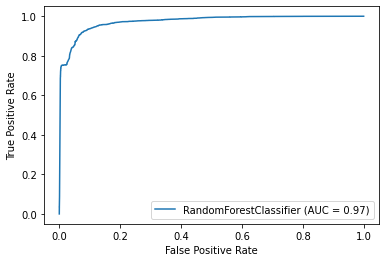

In [ ]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

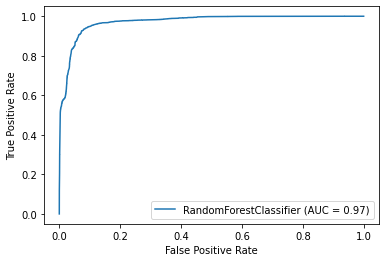

In [ ]:
plot_roc_curve(rf_best,X_train_res, y_train_res)
plt.show()



**Predicting on test set**

In [ ]:
y_test_pred = rf_best.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test_pred = rf.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:

print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.9440184697661947
F1 score:  0.10154219372725698
Recall:  0.8195804195804196
Precision:  0.054123949385794776
ROC_AUC_SCORE:  0.8820405322403249

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.82      0.10      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.88      0.54    555719
weighted avg       1.00      0.94      0.97    555719


 confussion matrix:
 [[522851  30723]
 [   387   1758]]


In [ ]:
rf_best.feature_importances_

array([6.40880905e-01, 6.67894555e-02, 1.82554280e-02, 7.77577740e-03,
       1.55492788e-02, 4.45816914e-03, 1.28774337e-02, 6.36878380e-03,
       3.11882937e-02, 7.13815979e-03, 1.77730391e-02, 4.93631821e-03,
       5.81832882e-03, 1.21469805e-02, 1.53419400e-02, 4.49995832e-03,
       9.55535264e-04, 3.73583879e-04, 1.99216529e-04, 5.43553657e-04,
       1.58706552e-03, 3.75814865e-05, 1.51695767e-04, 1.15711692e-04,
       6.40457407e-04, 2.29760089e-04, 4.43160903e-05, 1.41634955e-04,
       1.10148860e-03, 9.17884240e-04, 9.60961849e-04, 9.02869916e-04,
       1.01788874e-04, 1.70044513e-04, 1.35142498e-03, 3.68897953e-04,
       3.46174073e-04, 2.31277732e-04, 1.24425159e-03, 5.20297907e-04,
       2.19132206e-04, 1.40411590e-04, 1.22874881e-03, 5.44781057e-04,
       5.80766020e-05, 2.70171384e-05, 1.62849667e-04, 3.20671110e-04,
       1.23382104e-03, 2.03919950e-03, 2.72607764e-03, 2.62514443e-04,
       1.18847504e-03, 9.45986350e-05, 2.42467428e-04, 3.59455838e-05,
      

In [ ]:

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
0,amt,0.640881
1,gender,0.066789
67,trans_month_December,0.035732
8,category_home,0.031188
69,trans_month_June,0.019638
2,city_pop,0.018255
10,category_misc_net,0.017773
4,category_gas_transport,0.015549
14,category_shopping_pos,0.015342
68,trans_month_July,0.013477


Testing on original data without oversampling

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1289169
           1       0.07      0.84      0.12      7506

    accuracy                           0.93   1296675
   macro avg       0.53      0.89      0.54   1296675
weighted avg       0.99      0.93      0.96   1296675

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.82      0.10      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.88      0.54    555719
weighted avg       1.00      0.94      0.97    555719



**TOP 10 IMPORTANT VARIABLES**

- amt	
- gender
- category_gas_transport
- trans_month_July
- category_home	
- trans_month_December
- category_misc_net
- category_shopping_net
- city_pop

## Cost benefit Analysis




In [105]:
df_train1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraud detection case study/fraudTrain.csv')

In [106]:
df_train_merge = df_train1[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [103]:
# Creating dataframe of y_train_pred

df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [107]:
# Merging the two dataframes

df_train_final = pd.concat([df_train_merge, df_train_pred],axis=1)
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [108]:

# Renaming column

df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [109]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [110]:

df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1202983
1      93692
Name: is_fraud_pred, dtype: int64

In [118]:
df_test1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraud detection case study/fraudTest.csv')

In [117]:
df_test_merge = df_test1[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [119]:
# Subset of df_test

df_test_merge = df_test1[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [121]:
# Creating dataframe of y_test_pred

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [122]:
# Merging the two dataframes

df_test_final = pd.concat([df_test_merge, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [123]:
# Renaming column

df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [124]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [125]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    523238
1     32481
Name: is_fraud_pred, dtype: int64

In [126]:
# Merging train and test dataset for cost benefit analysis

df_merge_final = pd.concat([df_train_final, df_test_final],axis=0)
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [127]:

df_merge_final.shape

(1852394, 5)

In [128]:
# Creating month and year columns

df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [129]:
# Group by variable creation

g = df_merge_final.groupby(["year","month"])

In [130]:

# Number of transactions per month

g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [131]:

# Average number of transactions per month

df_merge_final.trans_num.count()/24

77183.08333333333

In [132]:
# Average Number of fraudulent transactions per month

df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24

402.125

In [133]:
# Average amount per fraud transaction

df_merge_final[df_merge_final['is_fraud']==1].amt.mean()

530.6614122888789

In [134]:
# Average number of transactions per month detected as fraud by the model

df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24

5257.208333333333

In [135]:

# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

65.83333333333333